In [1]:
cat('Last updated ', date())

Last updated  Sat Oct 22 13:13:38 2022

_This is a study note while I am studyig __Generalized Linear Models and Nonparametric Regression__ offered by University of Colorado Boulder in Coursera_

### Smoothing Spline in R

Suppose $U(0,\pi/2)$, and let $Y = \sin(\pi x) + \varepsilon$, where $\varepsilon \overset{iid}{\sim} N(0,0.5^2)$.

In [39]:
set.seed(123)

n = 150
x = runif(n, 0, pi/2) 
y = sin(pi*x) + rnorm(n, 0, 0.5) + 4

df = data.frame(x = x, y = y)
head(df)

,x,y
,<dbl>,<dbl>
1,0.45172571,5.501308
2,1.23826681,3.177046
3,0.64241945,4.291206
4,1.38704049,3.152961
5,1.47728256,2.933100
6,0.07155998,4.225805


A cubic smoothing spline is the class of functions that minimizes


$$\underbrace{ \frac{1}{n}\sum_{i=1}^n (Y_i - f(x_i))^2}_\text{fit} + 
  \underbrace{  \lambda \int [f^{\prime\prime}(x)]^2dx}_\text{smoothness}$$

In the R function, __smooth.spline(x,y, spar= ...)__ spar is a function of $\lambda$.

In [ ]:
# install.packages('cowplot')
library(cowplot)
library(ggplot2)

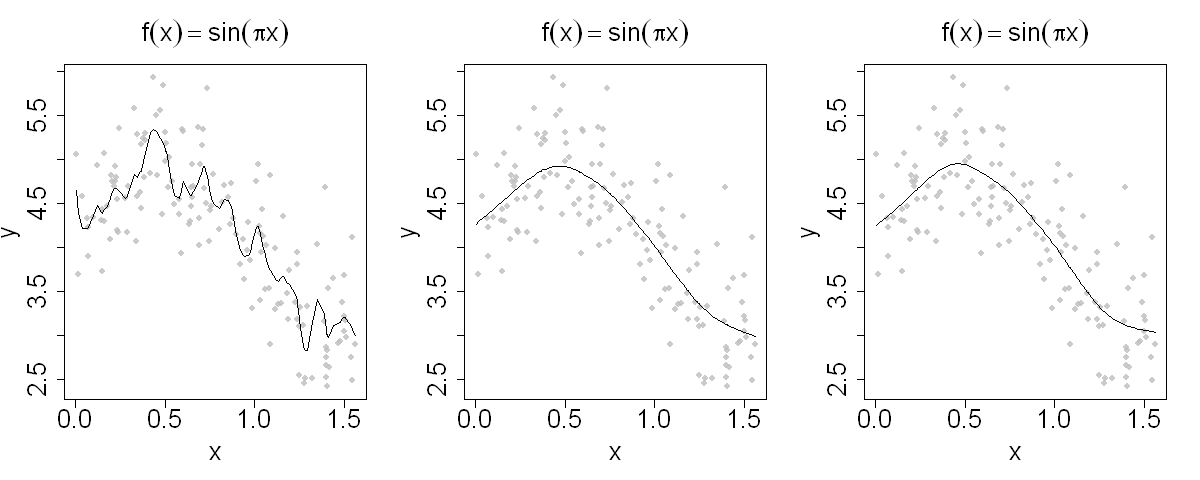

In [40]:


options(repr.plot.width=10, repr.plot.height=4)
par(mfrow=c(1,3))

plot(y ~ x, main = expression(f(x) == sin(pi*x)) , pch = 16, col = alpha("grey", 0.8), cex.axis = 2, cex.lab = 2, cex.main = 2, lwd=5)
lines(smooth.spline(x, y, spar = 0.5))

plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8), cex.axis = 2, cex.lab = 2, cex.main = 2, lwd=5)
lines(smooth.spline(x,y, spar = 1))

plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8), cex.axis = 2, cex.lab = 2, cex.main = 2, lwd=5)
lines(smooth.spline(x,y))

__How to choose $\lambda$? Use Leave-One-Out Cross-Validation (LOOCV)__

In [41]:
spar_seq = seq(from=0.05,to=1, by=0.05) # grid of spar values
CV_err_spar = rep(NA,length(spar_seq)) 

for(j in 1:length(spar_seq)){
    spar_using = spar_seq[j] 
    CV_err = rep(NA, n) #recall that n is the sample size, as defined above
    for(i in 1:n){
        x_test = x[i] #leave one x value out for CV
        y_test = y[i] #leave one y value out for CV

        x_tr = x[-i] #make the remaining x values the x values for the training set
        y_tr = y[-i] #make the remaining y values the y values for the training set
     
    y_test_predict = predict(smooth.spline(x = x_tr,y = y_tr, spar = spar_using), x_test) #predicted value in test set
    CV_err[i] = (y_test - y_test_predict$y)^2 # squared error
    }
    
CV_err_spar[j] = mean(CV_err) #CV: mean of the squared errors
    
}

s = spar_seq[which.min(CV_err_spar)] #the "best" spar value, as measured by leave-one-out CV

cat("The cross validation procedure chooses spar = ", s, ".")

The cross validation procedure chooses spar =  1 .

We can plot the "leave one out cross validation error"  𝐶𝑉(𝑠𝑝𝑎𝑟)  as a function of spar to visualize the minimum.

In [32]:
spar_seq

[1] 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75
[16] 0.80 0.85 0.90 0.95 1.00

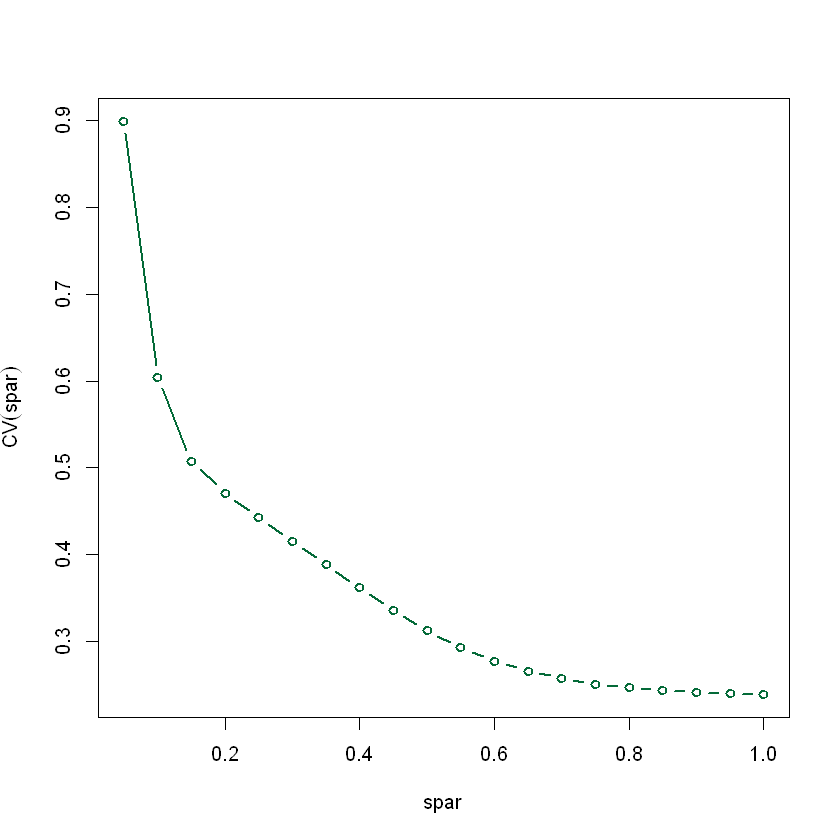

In [47]:
options(repr.plot.width=7, repr.plot.height=7) 
plot(x=spar_seq, y=CV_err_spar, type="b", lwd=2, col="#046A38", 
      xlab="spar", ylab= expression(CV(spar)))

In [43]:
cat("And, we can plot the simulated data and fitted smoothing spline fit using the spar of ", s, ".")

And, we can plot the simulated data and fitted smoothing spline fit using the spar of  1 .

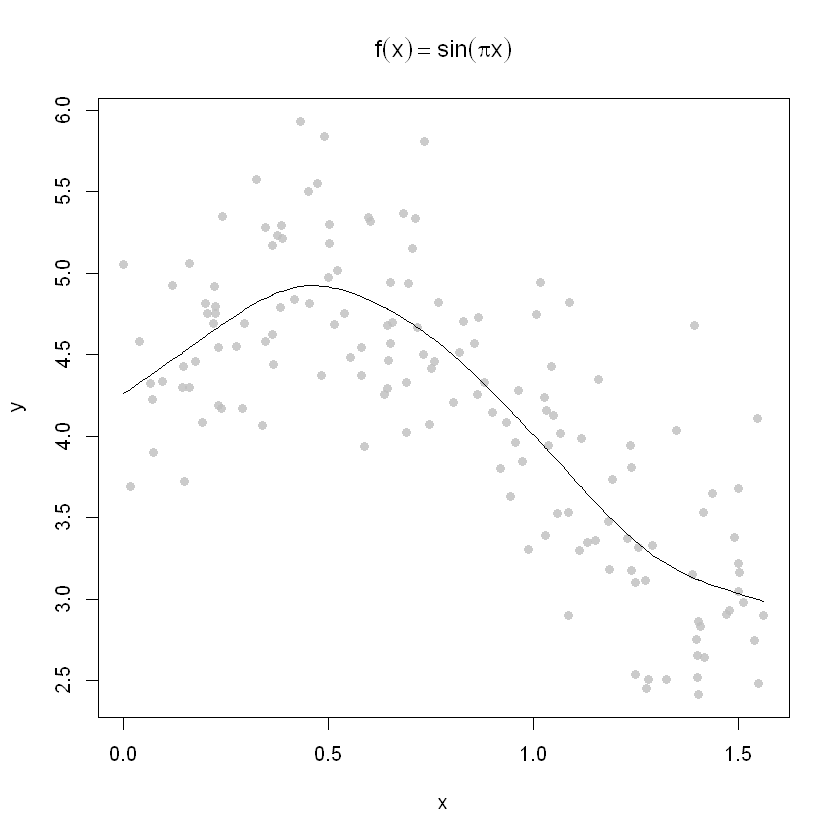

In [44]:
plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8))
lines(smooth.spline(x,y, spar = s))